# Análisis de Datos de Fraude en Seguros de Auto

## 1. Preparación de los Datos

### 1.1 Carga de Librerías

In [1]:
# Cargamos las librerías a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Mostramos todas las columnas
pd.set_option('display.max_columns', None)

### 1.2 Carga de Datos

In [2]:
# Nombramos el dataframe
car_fraud = pd.read_csv('.\..\data\Dataset.csv')

# Mostramos un encabezado de los datos
car_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069420
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455570
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374340


In [3]:
# Mostramos el número de filas, columnas, valores NO nulos y el tipo de datos
car_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

### 1.3 Estadística Descriptiva

In [4]:
# Resumimos las variables numéricas
car_fraud.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,11565.0,2.78,1.28,1.0,2.00,3.00,4.00,5.00
WeekOfMonthClaimed,11565.0,2.70,1.26,1.0,2.00,3.00,4.00,5.00
Age,11560.0,39.90,13.59,0.0,31.00,38.00,49.00,80.00
FraudFound_P,11565.0,0.06,0.24,0.0,0.00,0.00,0.00,1.00
PolicyNumber,11565.0,7710.47,4453.76,1.0,3851.00,7712.00,11542.00,15420.00
RepNumber,11565.0,8.47,4.62,1.0,4.00,8.00,12.00,16.00
Deductible,11565.0,407.62,43.40,300.0,400.00,400.00,400.00,700.00
DriverRating,11559.0,2.49,1.12,1.0,1.00,3.00,3.00,4.00
Year,11565.0,1994.87,0.80,1994.0,1994.00,1995.00,1996.00,1996.00
ClaimSize,11565.0,22955.98,26988.81,0.0,4148.85,8130.99,46299.65,141394.16


In [5]:
# Resuminos las variables categóricas
car_fraud.describe(include = ['O']).T

,count,unique,top,freq
Month,11565,12,Jan,1056
DayOfWeek,11565,7,Monday,2000
Make,11565,19,Pontiac,2899
AccidentArea,11565,2,Urban,10356
DayOfWeekClaimed,11565,8,Monday,2811
MonthClaimed,11565,13,Jan,1084
Sex,11565,2,Male,9768
MaritalStatus,11565,4,Married,7986
Fault,11565,2,Policy Holder,8394
PolicyType,11565,9,Sedan - Collision,4186


### 1.4 Limpieza de Datos

In [6]:
# Mostramos el número de valores nulos
#car_fraud.isnull().any()

car_fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [7]:
# Imputamos los valores nulos
# Esto también se puede realizar con pipeline SimpleImputer

median_age = car_fraud['Age'].median()
car_fraud['Age'] = car_fraud['Age'].fillna(median_age)
median_DR = car_fraud['DriverRating'].median()
car_fraud['DriverRating'] = car_fraud['DriverRating'].fillna(median_DR)
car_fraud.isnull().any()

Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
PolicyNumber            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
Year                    False
BasePolicy              False
ClaimSize 

In [8]:
# Filtramos los valores con 0
car_fraud[car_fraud['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
1146,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2.0,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,70530.64695


In [9]:
# Reemplazamos los valores con 0

car_fraud['DayOfWeekClaimed'] = car_fraud['DayOfWeekClaimed'].replace('0', 'Monday')
car_fraud['MonthClaimed'] = car_fraud['MonthClaimed'].replace('0', 'Jan')

car_fraud['Age'] = car_fraud['Age'].replace(0, median_age)

mean_ClaimSize = car_fraud['ClaimSize'].mean()
car_fraud['ClaimSize'] = car_fraud['ClaimSize'].replace(0, mean_ClaimSize)

print(car_fraud.groupby('DayOfWeekClaimed').size())
print(car_fraud.groupby('MonthClaimed').size())
print(car_fraud.groupby('Age').size())
print(car_fraud.groupby('ClaimSize').size())

DayOfWeekClaimed
Friday       1842
Monday       2812
Saturday       94
Sunday         40
Thursday     2000
Tuesday      2545
Wednesday    2232
dtype: int64
MonthClaimed
Apr     970
Aug     846
Dec     879
Feb     955
Jan    1085
Jul     908
Jun     967
Mar    1005
May    1038
Nov     973
Oct     995
Sep     944
dtype: int64
Age
16.0     8
17.0     5
18.0    34
19.0    24
20.0    15
        ..
76.0    32
77.0    20
78.0    26
79.0    12
80.0    25
Length: 65, dtype: int64
ClaimSize
504.579779       4
512.670474       1
532.514606       1
538.137878       5
542.627889       2
                ..
100701.441000    1
103375.047400    1
103420.785300    1
104194.696400    1
141394.159300    1
Length: 3332, dtype: int64


In [10]:
# Validamos el número de filas y columnas
car_fraud.shape

(11565, 34)

### 1.5 Ingeniería de Características

### 1.6 Codificación de Datos

In [11]:
# Separamos las variables numericas
numerical = car_fraud.select_dtypes(include = np.number).columns.tolist()
numerical.remove('FraudFound_P')
numerical.remove('PolicyNumber')
numerical

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year',
 'ClaimSize']

In [12]:
# Separamos las variables ordinales
ordinal = car_fraud.select_dtypes(exclude = np.number).columns.tolist()
ordinal

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [13]:
columnas = ordinal + numerical

In [14]:
columnas

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy',
 'WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year',
 'ClaimSize']

In [15]:
# Dividimos los datos
X = car_fraud[columnas]
y = car_fraud['FraudFound_P']

In [16]:
print(X.shape)
print(y.shape)

(11565, 32)
(11565,)


In [18]:
# Dividimos los datos de entrenamiento y prueba
X_train, Xtest, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

In [19]:
X_train.shape

(9252, 32)

In [ ]:
# Pipeline datos ordinales
#ordinal_pipeline

In [20]:
# Ordenamos las variables categóricos ordinales y nominales
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DayOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Make = ['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW']
AccidentArea = ['Rural', 'Urban']
DayOfWeekClaimed = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MonthClaimed = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Sex = ['Male', 'Female']
MaritalStatus = ['Single', 'Married', 'Widow', 'Divorced']
Fault = ['Policy Holder', 'Third Party']
PolicyType = ['Sport - Liability', 'Sport - Collision', 'Sedan - Liability', 'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision', 'Utility - Liability', 'Utility - All Perils', 'Sport - All Perils']
VehicleCategory = ['Sport', 'Sedan', 'Utility']
VehiclePrice = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
Days_Policy_Accident = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
Days_Policy_Claim = ['none', '8 to 15', '15 to 30', 'more than 30']
PastNumberOfClaims = ['none', '1', '2 to 4', 'more than 4']
AgeOfVehicle = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
AgeOfPolicyHolder = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
PoliceReportFiled = ['No', 'Yes']
WitnessPresent = ['No', 'Yes']
AgentType = ['External', 'Internal']
NumberOfSuppliments = ['none', '1 to 2', '3 to 5', 'more than 5']
AddressChange_Claim = ['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years']
NumberOfCars = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 9']
BasePolicy = ['Liability', 'Collision', 'All Perils']

In [21]:
# Asignamos las variables categóricos ordinales y nominales
categorias = [Month,
              DayOfWeek,
              Make,
              AccidentArea,
              DayOfWeekClaimed,
              MonthClaimed,
              Sex,
              MaritalStatus,
              Fault,
              PolicyType,
              VehicleCategory,
              VehiclePrice,
              Days_Policy_Accident,
              Days_Policy_Claim,
              PastNumberOfClaims,
              AgeOfVehicle,
              AgeOfPolicyHolder,
              PoliceReportFiled,
              WitnessPresent,
              AgentType,
              NumberOfSuppliments,
              AddressChange_Claim,
              NumberOfCars,
              BasePolicy]

In [22]:
codificador = OrdinalEncoder(categories = [categorias], handle_unknown='use_encoded_value', unknown_value=-1)

In [24]:
transformador = make_column_transformer(
    (codificador, [ordinal]),
     remainder = 'passthrough')

In [36]:
transformador.fit_transform(X_train)

TypeError: unhashable type: 'list'

### 1.7 Column Transformer

In [11]:
# Dividimos los datos
X = car_fraud.drop(['FraudFound_P', 'PolicyNumber'], axis = 1)
y = car_fraud['FraudFound_P']

In [12]:
print(X.shape)
print(y.shape)

(11565, 32)
(11565,)


In [13]:
# Dividimos los datos en entrenamiento y prueba
X_train, Xtest, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

In [14]:
# Ordenamos los objetos categóricos ordinales y nominales
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DayOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Make = ['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW']
AccidentArea = ['Rural', 'Urban']
DayOfWeekClaimed = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MonthClaimed = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Sex = ['Male', 'Female']
MaritalStatus = ['Single', 'Married', 'Widow', 'Divorced']
Fault = ['Policy Holder', 'Third Party']
PolicyType = ['Sport - Liability', 'Sport - Collision', 'Sedan - Liability', 'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision', 'Utility - Liability', 'Utility - All Perils', 'Sport - All Perils']
VehicleCategory = ['Sport', 'Sedan', 'Utility']
VehiclePrice = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
Days_Policy_Accident = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
Days_Policy_Claim = ['none', '8 to 15', '15 to 30', 'more than 30']
PastNumberOfClaims = ['none', '1', '2 to 4', 'more than 4']
AgeOfVehicle = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
AgeOfPolicyHolder = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
PoliceReportFiled = ['No', 'Yes']
WitnessPresent = ['No', 'Yes']
AgentType = ['External', 'Internal']
NumberOfSuppliments = ['none', '1 to 2', '3 to 5', 'more than 5']
AddressChange_Claim = ['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years']
NumberOfCars = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 9']
BasePolicy = ['Liability', 'Collision', 'All Perils']

In [ ]:
# Aplicamos StandarScaler a objetos y numeros

In [15]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1,categories = [Month,
                                                                                       DayOfWeek,
                                                                                       Make,
                                                                                       AccidentArea,
                                                                                       DayOfWeekClaimed,
                                                                                       MonthClaimed,
                                                                                       Sex,
                                                                                       MaritalStatus,
                                                                                       Fault,
                                                                                       PolicyType,
                                                                                       VehicleCategory,
                                                                                       VehiclePrice,
                                                                                       Days_Policy_Accident,
                                                                                       Days_Policy_Claim,
                                                                                       PastNumberOfClaims,
                                                                                       AgeOfVehicle,
                                                                                       AgeOfPolicyHolder,
                                                                                       PoliceReportFiled,
                                                                                       WitnessPresent,
                                                                                       AgentType,
                                                                                       NumberOfSuppliments,
                                                                                       AddressChange_Claim,
                                                                                       NumberOfCars,
                                                                                       BasePolicy])

In [16]:
ct = make_column_transformer(
    (oe, ['Month',
          'DayOfWeek',
          'Make',
          'AccidentArea'
          'DayOfWeekClaimed',
          'MonthClaimed',
          'Sex',
          'MaritalStatus',
          'Fault',
          'PolicyType',
          'VehicleCategory',
          'VehiclePrice',
          'Days_Policy_Accident',
          'Days_Policy_Claim',
          'PastNumberOfClaims',
          'AgeOfVehicle',
          'AgeOfPolicyHolder',
          'PoliceReportFiled',
          'WitnessPresent',
          'AgentType',
          'NumberOfSuppliments',
          'AddressChange_Claim',
          'NumberOfCars',
          'BasePolicy']),
     remainder = 'passthrough')

In [17]:
X_train = pd.DataFrame(ct.fit_transform(X_train),
                        columns = ['Month',
                                   'DayOfWeek',
                                   'Make',
                                   'AccidentArea',
                                   'DayOfWeekClaimed',
                                   'MonthClaimed',
                                   'Sex',
                                   'MaritalStatus',
                                   'Fault',
                                   'PolicyType',
                                   'VehicleCategory',
                                   'VehiclePrice',
                                   'Days_Policy_Accident',
                                   'Days_Policy_Claim',
                                   'PastNumberOfClaims',
                                   'AgeOfVehicle',
                                   'AgeOfPolicyHolder',
                                   'PoliceReportFiled',
                                   'WitnessPresent',
                                   'AgentType',
                                   'NumberOfSuppliments',
                                   'AddressChange_Claim',
                                   'NumberOfCars',
                                   'BasePolicy',
                                   'WeekOfMonth',
                                   'WeekOfMonthClaimed',
                                   'Age',
                                   'RepNumber',
                                   'Deductible',
                                   'DriverRating',
                                   'Year',
                                   'ClaimSize'])

ValueError: A given column is not a column of the dataframe

In [93]:
X_train.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,ClaimSize
0,7.0,6.0,18.0,1.0,0.0,7.0,0.0,1.0,1.0,4.0,1.0,3.0,4.0,3.0,2.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,50.0,6.0,400.0,1.0,1994.0,51208.187440
1,9.0,2.0,18.0,0.0,1.0,9.0,0.0,1.0,0.0,4.0,1.0,2.0,4.0,3.0,1.0,5.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,4.0,35.0,15.0,400.0,4.0,1995.0,14037.739210
2,7.0,6.0,17.0,0.0,4.0,8.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,3.0,0.0,5.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,27.0,10.0,400.0,2.0,1996.0,4413.580770
3,8.0,4.0,9.0,1.0,5.0,9.0,0.0,1.0,0.0,2.0,0.0,0.0,4.0,3.0,2.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,40.0,5.0,400.0,2.0,1996.0,6223.272058
4,0.0,2.0,6.0,1.0,2.0,1.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,25.0,16.0,400.0,2.0,1995.0,1815.569212


In [92]:
X_train.shape

(9252, 32)

In [94]:
# Elaboramos la matriz de correlación de Pearson
# pd.set_option('display.width', 150)
correlation = X_train.corr(method = 'pearson').round(2)
correlation

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,Age,RepNumber,Deductible,DriverRating,Year,ClaimSize
Month,1.00,0.00,0.01,-0.01,-0.02,0.83,0.01,0.01,-0.00,0.04,0.02,-0.03,0.01,0.01,-0.01,0.01,0.01,0.04,0.01,0.01,0.03,0.00,-0.01,-0.00,0.03,0.05,0.00,0.01,-0.00,0.01,0.05,-0.02
DayOfWeek,0.00,1.00,0.01,-0.03,-0.07,0.00,-0.01,-0.03,0.02,0.02,0.03,-0.03,-0.00,0.03,-0.03,-0.01,0.00,0.02,0.01,-0.00,0.01,0.01,-0.02,0.04,-0.02,-0.01,0.00,0.01,0.01,-0.01,0.01,-0.02
Make,0.01,0.01,1.00,0.01,0.02,0.01,0.03,0.03,0.00,-0.04,-0.01,-0.25,0.00,0.01,-0.04,0.06,0.06,-0.02,-0.01,-0.03,0.01,0.01,0.00,0.02,-0.01,-0.02,0.05,0.00,0.03,0.00,0.00,-0.19
AccidentArea,-0.01,-0.03,0.01,1.00,0.02,-0.00,0.03,0.01,0.01,-0.06,-0.07,-0.01,0.00,0.01,0.07,0.01,0.01,-0.00,-0.04,0.01,-0.03,-0.02,-0.01,-0.05,0.01,-0.00,0.01,0.01,-0.01,-0.00,0.00,0.00
DayOfWeekClaimed,-0.02,-0.07,0.02,0.02,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.00,-0.01,-0.02,0.00,0.00,0.01,-0.00,-0.02,-0.01,0.01,0.00,-0.00,0.00,0.01,0.01,-0.02,-0.01,0.01,0.01,-0.01,-0.00,0.00
MonthClaimed,0.83,0.00,0.01,-0.00,-0.00,1.00,0.01,0.01,-0.00,0.04,0.02,-0.06,0.01,0.01,-0.02,0.03,0.03,0.05,0.01,0.02,0.04,-0.00,-0.01,-0.01,0.01,0.05,0.02,0.02,0.00,0.00,0.04,-0.04
Sex,0.01,-0.01,0.03,0.03,-0.00,0.01,1.00,-0.08,-0.00,-0.06,-0.07,-0.12,-0.00,-0.01,-0.00,-0.11,-0.06,0.02,0.00,-0.01,-0.00,-0.00,-0.00,-0.07,-0.01,-0.01,-0.07,0.00,-0.02,0.01,0.00,-0.10
MaritalStatus,0.01,-0.03,0.03,0.01,0.01,0.01,-0.08,1.00,0.01,0.05,0.06,-0.03,-0.00,0.00,-0.01,0.41,0.44,-0.01,-0.01,0.00,0.02,-0.01,-0.00,0.06,-0.02,-0.01,0.42,0.01,0.04,0.01,0.01,-0.02
Fault,-0.00,0.02,0.00,0.01,0.01,-0.00,-0.00,0.01,1.00,0.03,0.13,-0.04,-0.03,-0.02,-0.12,0.02,0.01,0.02,0.06,0.01,0.01,-0.00,-0.01,0.21,0.02,-0.00,0.01,0.00,-0.01,-0.02,0.02,-0.06
PolicyType,0.04,0.02,-0.04,-0.06,-0.01,0.04,-0.06,0.05,0.03,1.00,0.87,0.01,-0.01,-0.01,-0.13,0.04,0.02,0.03,0.01,-0.02,-0.01,0.01,0.00,0.49,-0.00,-0.00,0.01,-0.00,0.00,0.00,0.01,-0.05


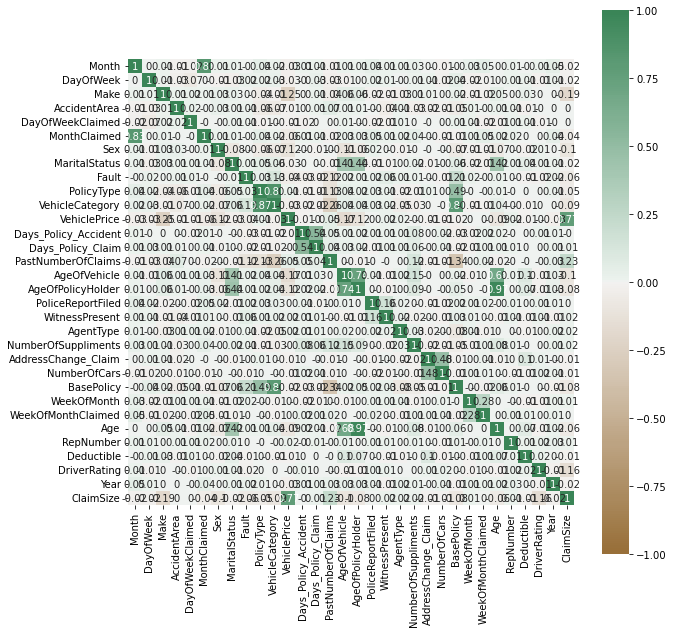

In [95]:
# Trazamos un mapa de calor para visualizar la correlación entre variables
#plt.rcParams['figure.figsize'] = (10,10)
plt.figure(figsize = (10,10))
axis_corr = sns.heatmap(correlation,
vmin=-1, vmax=1, center=0, annot=True,
cmap=sns.diverging_palette(50, 500, n=500),
square=True)
plt.show()

## 2. Procesamiento de los Datos

### 2.1 Escalamiento de Variables

In [11]:
# Dividimos los datos

### 2.2 División de los datos

### 2.3 Remuestreo / División en entrenamiento y prueba

In [12]:
# Elaboramos la matriz de correlación de Pearson
# pd.set_option('display.width', 150)
correlation = data_selection.corr(method = 'pearson').round(2)
correlation

,Sex,Age,Deductible,DriverRating,PoliceReportFiled,WitnessPresent,ClaimSize,FraudFound_P
Sex,1.00,0.07,0.02,-0.01,-0.01,0.00,0.10,0.03
Age,0.07,1.00,0.06,0.00,-0.00,-0.01,-0.07,-0.03
Deductible,0.02,0.06,1.00,0.02,0.01,-0.00,-0.01,0.03
DriverRating,-0.01,0.00,0.02,1.00,0.01,0.02,-0.14,0.01
PoliceReportFiled,-0.01,-0.00,0.01,0.01,1.00,0.16,-0.00,-0.01
WitnessPresent,0.00,-0.01,-0.00,0.02,0.16,1.00,0.01,-0.01
ClaimSize,0.10,-0.07,-0.01,-0.14,-0.00,0.01,1.00,0.02
FraudFound_P,0.03,-0.03,0.03,0.01,-0.01,-0.01,0.02,1.00


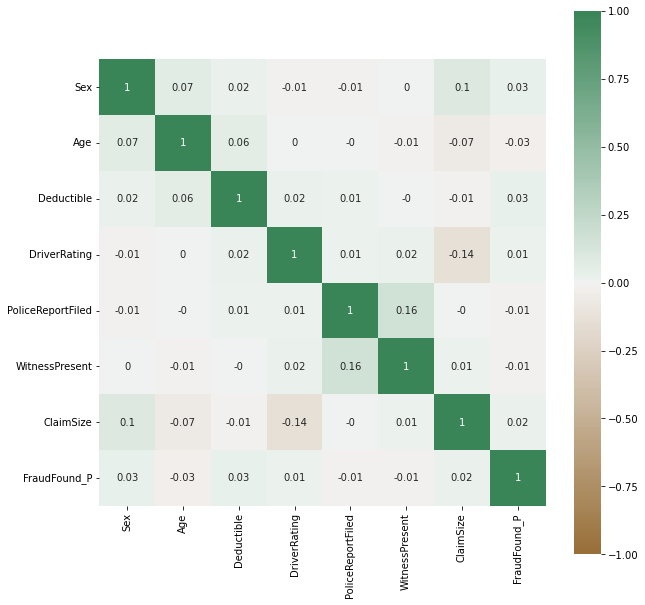

In [13]:
# Trazamos un mapa de calor para visualizar la correlación entre variables
#plt.rcParams['figure.figsize'] = (10,10)
plt.figure(figsize = (10,10))
axis_corr = sns.heatmap(correlation,
vmin=-1, vmax=1, center=0, annot=True,
cmap=sns.diverging_palette(50, 500, n=500),
square=True)
plt.show()

In [14]:
# Calculamos el sesgo o asimietría de cada atributo
# Inclinación positiva (derecha) o negativa (izquierda)
# Los valores más cercanos a cero tienen menos sesgo
data_selection.skew()

Sex                  -1.902796
Age                   0.125849
Deductible            6.139970
DriverRating          0.001588
PoliceReportFiled     5.664199
WitnessPresent       12.927598
ClaimSize             1.187685
FraudFound_P          3.734942
dtype: float64